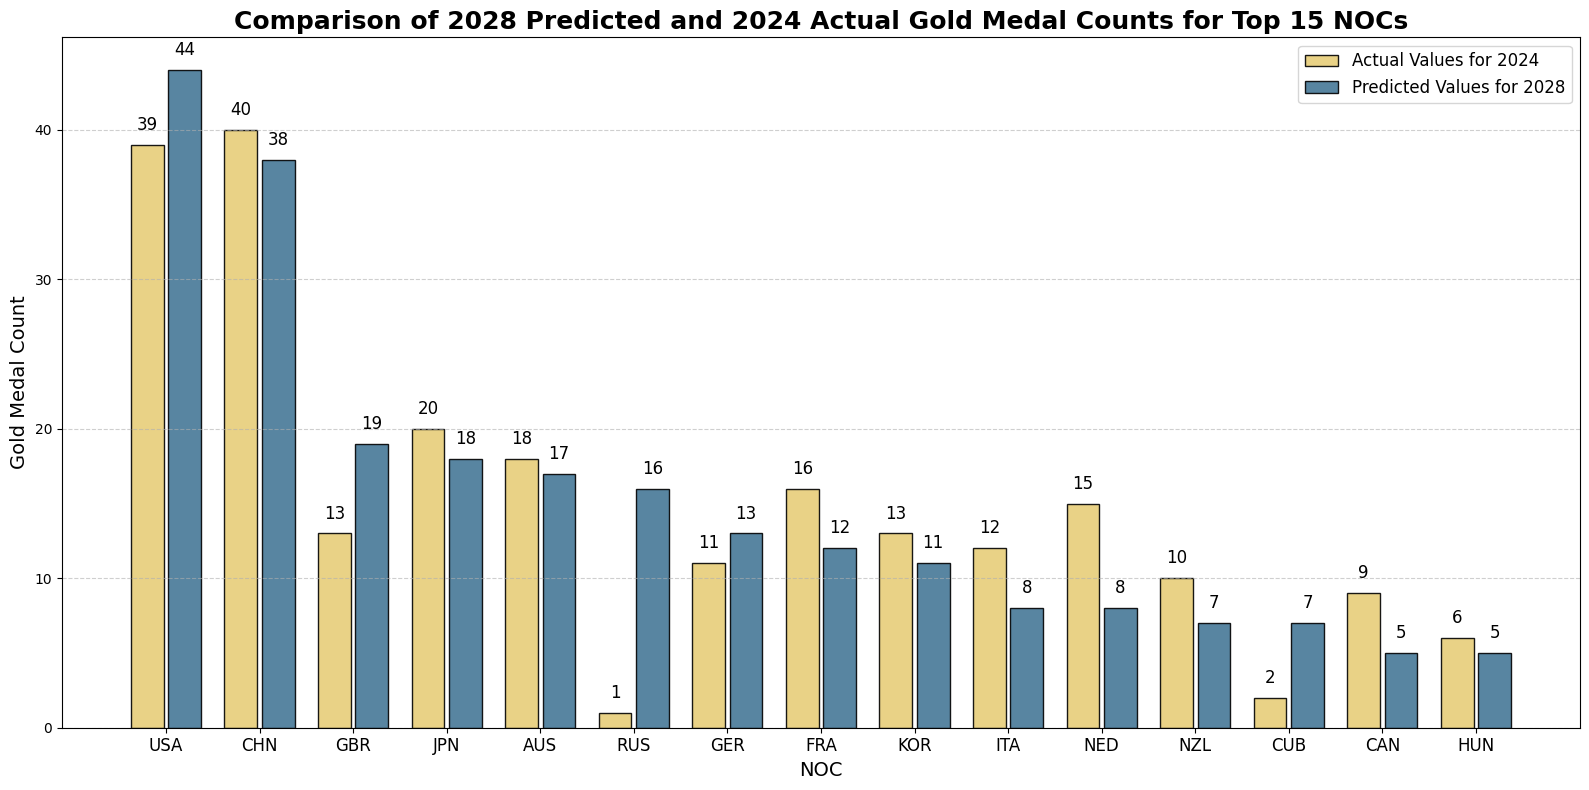

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import sem, t

# 读取10个.npy文件并合并为一个数组
vectors = []
for i in range(1):
    vectors.append(np.load(f"data/result_gold/pred_medals_test.npy"))

# 将10个N维向量堆叠为一个矩阵
vectors = np.vstack(vectors)  # shape: (10, N)
vectors *= 1.05

# 从noc_to_idx.npy加载映射字典
noc_to_idx = np.load("data/noc_to_idx.npy", allow_pickle=True).item()
idx_to_noc = {v: k for k, v in noc_to_idx.items()}  # 反转字典以从索引获取NOC

# 计算每一维的均值
means = np.mean(vectors, axis=0)  # shape: (N,)
# 取整
means = means.astype(int)

# 只选取均值最大的20个维度
max_indices = np.argsort(means)[-15:][::-1]  # 获取前20个维度的索引并倒排

# 获得2024年数据
true_values_all = np.load('data/medal_count_gold.npy')
compare_values = true_values_all[30]
# 设为整数
compare_values = compare_values.astype(int)


# # 自定义蓝色系渐变
# blue_colors = ["#dae8fc", "#b2d5f7", "#8cc4f0", "#66b2e6", "#4499d0", "#267bb5"]
# custom_blue_cmap = LinearSegmentedColormap.from_list("custom_blues", blue_colors)

# # 自定义红色系渐变
# red_colors = ["#fcdada", "#f7b2b2", "#f08c8c", "#e66666", "#d04444", "#b52626"]
# custom_red_cmap = LinearSegmentedColormap.from_list("custom_reds", red_colors)

# 动态生成 x 轴
x = np.arange(len(max_indices))

# 生成颜色映射
norm_blue = plt.Normalize(vmin=min(compare_values[max_indices]), vmax=max(compare_values[max_indices]))
bar_colors_blue =   '#E7CD79' #'#B7B896' 

norm_red = plt.Normalize(vmin=min(means[max_indices]), vmax=max(means[max_indices]))
bar_colors_red =   '#467897' #'#A46057'

# 绘制对比柱状图
bar_width = 0.35  # 设置柱宽
bar_spacing = 0.05  # 每组柱之间的间隙
plt.figure(figsize=(16, 8))

# 绘制compare_values的柱状图
plt.bar(x - (bar_width + bar_spacing) / 2, compare_values[max_indices], width=bar_width, color=bar_colors_blue, label='Actual Values for 2024', alpha=0.9, edgecolor='black')

# 绘制means的柱状图
plt.bar(x + (bar_width + bar_spacing) / 2, means[max_indices], width=bar_width, color=bar_colors_red, label='Predicted Values for 2028', alpha=0.9, edgecolor='black')

# 设置 x 轴标签为NOC
plt.xticks(x, [idx_to_noc[idx] for idx in max_indices], rotation=0, fontsize=12)

# 添加数值标签
for i, (comp_val, mean_val) in enumerate(zip(compare_values[max_indices], means[max_indices])):
    plt.text(x[i] - (bar_width + bar_spacing) / 2, comp_val + 1, f"{comp_val}", ha='center', fontsize=12, color='black')
    plt.text(x[i] + (bar_width + bar_spacing) / 2, mean_val + 1, f"{mean_val}", ha='center', fontsize=12, color='black')

# 设置图表信息
plt.xlabel('NOC', fontsize=14)
plt.ylabel('Gold Medal Count', fontsize=14)
plt.title('Comparison of 2028 Predicted and 2024 Actual Gold Medal Counts for Top 15 NOCs', fontsize=18, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')

# 增加网格以提高可读性
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 自动调整布局避免重叠
plt.tight_layout()
plt.show()


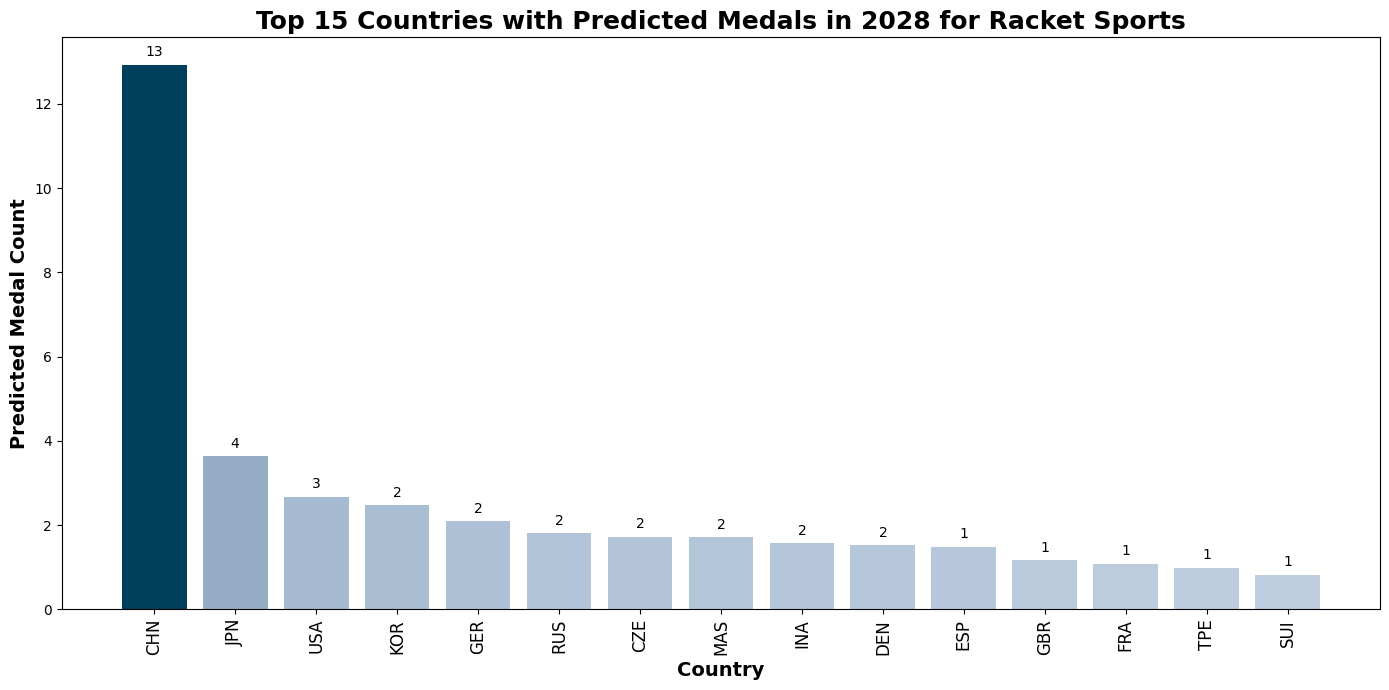

In [16]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


# 获得2024年数据
# true_values_all = np.load('data/medal_count.npy')
medal_dist = np.load('data/olympic_medals_with_type.npy')
true_values_all = medal_dist[9, :, :]
compare_values = true_values_all[30]
# 设为整数
compare_values = compare_values.astype(int)

total_count = np.sum(compare_values)

# 加载pred_medals
pred_medals = np.load('data/result/pred_medals_test.npy') 

# # rescale
# total_medals_list = np.load('data/total_medals_list.npy')
# pred_medals = pred_medals / sum(pred_medals) * total_medals_list[-1]
pred_medals = pred_medals / sum(pred_medals) * total_count



# 从noc_to_idx.npy加载映射字典
noc_to_idx = np.load("data/noc_to_idx.npy", allow_pickle=True).item()
idx_to_noc = {v: k for k, v in noc_to_idx.items()}  # 反转字典以从索引获取NOC



max_indices = np.argsort(pred_medals)[-15:]  # 获取前20名索引
# 倒排
max_indices = max_indices[::-1]
# 自定义蓝色系渐变，避免最高值出现偏红色
colors = ["#bfcde0", "#9eb5cc", "#6e81a8", "#4a6587", "#2f4b7c", "#003f5c"]
custom_cmap = LinearSegmentedColormap.from_list("custom_blues", colors)

# 假设 pred_medals 和 max_indices 已定义
# 动态生成 x 轴
x = range(1, len(max_indices) + 1)

# 生成颜色映射
norm = plt.Normalize(vmin=min(pred_medals[max_indices]), vmax=max(pred_medals[max_indices]))
colors = custom_cmap(norm(pred_medals[max_indices]))  # 根据数据生成蓝色系渐变颜色

# 绘制柱状图
plt.figure(figsize=(14, 7))  # 增加图表大小
plt.bar(x, pred_medals[max_indices], color=colors)

# 设置 x 轴标签为国家名称
plt.xticks(x, [idx_to_noc[idx] for idx in max_indices], rotation=90, fontsize=12)

# 添加数值标签
for i, value in enumerate(pred_medals[max_indices]):
    plt.text(x[i], value + 0.2, f"{value:.0f}", ha='center', fontsize=10, color='black')

# 设置图表信息（标题和轴标题字体更大并加粗）
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Medal Count', fontsize=14, fontweight='bold')
plt.title('Top 15 Countries with Predicted Medals in 2028 for Racket Sports', fontsize=18, fontweight='bold', )
# 自动调整布局避免重叠
plt.tight_layout()
plt.show()
